1. データの読み込み

In [34]:
import math
import random
import time
import warnings
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import os
import transformers as T
from pathlib import Path
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [19]:
warnings.filterwarnings("ignore")

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [21]:
def seed_torch(seed=42):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

seed = 471
seed_torch(seed)

In [22]:
DATA_DIR = './dataset/data2'

In [25]:
train = pd.read_csv(DATA_DIR  +"/train.csv", index_col=0)
test = pd.read_csv(DATA_DIR + "/test.csv", index_col=0)

In [28]:
train.head()

,id,title,abstract,judgement,fold,title_vector_0,title_vector_1,title_vector_2,title_vector_3,title_vector_4,...,title_vector_758,title_vector_759,title_vector_760,title_vector_761,title_vector_762,title_vector_763,title_vector_764,title_vector_765,title_vector_766,title_vector_767
0,0,One-year age changes in MRI brain volumes in o...,Longitudinal studies indicate that declines in...,0,0,-0.607368,0.214609,0.491671,0.585819,-0.481558,...,-0.346558,-0.154007,-0.117931,-0.730297,0.508722,-0.853626,-0.103609,-0.367437,0.437865,-0.956179
1,1,Supportive CSF biomarker evidence to enhance t...,The present study was undertaken to validate t...,0,1,-0.668105,0.257561,0.392438,0.400021,-0.309336,...,-0.290643,0.016189,-0.041532,-0.404358,0.553200,-0.726713,-0.378171,-0.173930,0.417677,-0.867161
2,2,Occurrence of basal ganglia germ cell tumors w...,Objective: To report a case series in which ba...,0,4,-0.418311,0.380539,0.428320,0.422149,-0.010591,...,-0.279595,-0.057832,-0.185633,-0.344625,0.426403,-0.636598,-0.220350,-0.417752,0.389819,-0.433953
3,3,New developments in diagnosis and therapy of C...,The etiology and pathogenesis of idiopathic ch...,0,3,-0.516953,0.167355,0.391707,0.479743,-0.377085,...,-0.420219,-0.101646,-0.248920,-0.573272,0.490884,-1.071567,-0.133990,-0.370881,0.267396,-0.936951
4,4,Prolonged shedding of SARS-CoV-2 in an elderly...,NaN,0,1,-0.591694,0.274961,0.413193,0.453942,-0.142811,...,-0.475409,-0.040903,-0.233842,-0.449259,0.592372,-0.901793,-0.269731,-0.337088,0.322325,-0.929041


In [74]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# 行列の標準化
dfs = train.iloc[:, 5:].apply(lambda x: (x-x.min())/(x.max()- x.min()), axis=0)
dfs.head()
#主成分分析の実
pca = PCA(n_components=2)
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

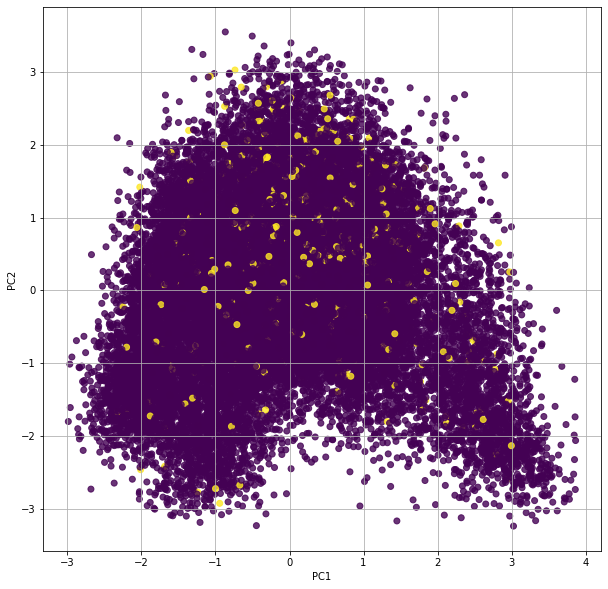

In [75]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(10, 10))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(train.loc[:, "judgement"]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [70]:
print(len((train['judgement']==1).values))

27145
